# **PRÉ-PROCESSAMENTO**

##### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

##### Lendo o arquivo tratado

In [2]:
df = pd.read_csv('../data/csv/processed/heart_tratado.csv', encoding='utf-8')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(917, 12)

In [5]:
df_2 = df.copy()

##### Codificação das variáveis categóricas manualmente

In [6]:
df_2['Sex'] = df_2['Sex'].replace({'M': 0, 'F':1})
df_2['ChestPainType'] = df_2['ChestPainType'].replace({'TA':0, 'ATA':1, 'NAP': 2, 'ASY':3})
df_2['RestingECG'] = df_2['RestingECG'].replace({'Normal':0, 'ST':1, 'LVH':2})
df_2['ExerciseAngina'] = df_2['ExerciseAngina'].replace({'N':0, 'Y':1})
df_2['ST_Slope'] = df_2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2})

C:\Users\felip\AppData\Local\Temp\ipykernel_15204\3051542082.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\felip\AppData\Local\Temp\ipykernel_15204\3051542082.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\felip\AppData\Local\Temp\ipykernel_15204\3051542082.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [7]:
df_2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [8]:
df_2.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [9]:
df_2.shape

(917, 12)

**LEGENDA**

* Age = Idade (anos)  
* Sex = Sexo (0=M, 1=F)  
* Chest Pain Type = Tipo de dor no peito (0=TA: Tangina Atípica; 1=ATA: * Angina Atípica; 2=NAP: Dor Não Anginosa; 3=ASY: Assintomático)  
* Resting BP = Pressão sanguínia em repouso (mmHg)  
* Cholesterol = Colesterol sérico (mg/dl)  
* Fasting BS = Açucar no sangue em jejum (mg/dl) (0=Fasting BS < 120 (não diabético); 1=Fasting BS>= 120 (diabético))  
* Resting ECG = Eletrocardiograma em repouso (0=Normal; 1=ST: * Anormalidade de onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)  
* MaxHR = Frequência cardiáca máxima  
* Exercise Angina = Angina indusida por exercício (0=N; 1=Y)  
* Old Peak = Depressão de ST induzida por exercício em relação ao repouso  
* ST_Slope = Inclinação do seguimento ST (0=UP; 1=Flat; 2=Down)  
* Heart Disease = Doença cardíaca (0=Não possui; 1=Possui)  

## **ATRIBUTOS PREVISORES E ALVO**

In [10]:
previsores = df_2.iloc[:, 0:11].values # iloc -> localiza pelo índice [todas as linhas, 10 primeiras colunas]
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]], shape=(917, 11))

In [11]:
previsores.shape

(917, 11)

In [12]:
target = df_2.iloc[:, 11] # Target -> alvo
target

0      0
1      1
2      0
3      1
4      0
      ..
912    1
913    1
914    1
915    1
916    0
Name: HeartDisease, Length: 917, dtype: int64

In [13]:
target.shape

(917,)

### **Análise das escalas (Escalonamento)**

Escalonamento busca fazer com que média fique próxima de zero e o desvio padrão fique próximo de 1 (como uma distribuição normal padrão).

In [14]:
df_2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.210469,2.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


Padronização (utiliza média e desvio padrão como referência)  
Normalização (utiliza os valores máximo e mínimo como referência)

In [15]:
from sklearn.preprocessing import StandardScaler # Padronização (StandardScaler) -> escala z-score. Média 0 e desvio padrão 1.
# Já a Normalização (MinMaxScaler) deixa os valores entre 0 e 1.

In [16]:
previsores_esc = StandardScaler().fit_transform(previsores) #Transformação de previsores quanto a sua escala utilizando padronização
previsores_esc

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.59651863],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.59651863],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.59651863],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -1.05109458]], shape=(917, 11))

In [17]:
previsores_df = pd.DataFrame(previsores_esc) # Transforma o previsores_esc em um dataframe
previsores_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,-0.516309,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,-0.516309,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,1.936826,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


In [18]:
previsores_df.mean()

0     1.859654e-16
1     7.748558e-18
2     1.046055e-16
3     7.767929e-16
4    -1.869340e-16
5     4.649135e-17
6     0.000000e+00
7    -5.114048e-16
8    -1.046055e-16
9     7.748558e-17
10   -3.874279e-17
dtype: float64

In [19]:
previsores_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,7.748558e-18,1.046055e-16,7.767929e-16,-1.869340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,4.194568e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.721265e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00


In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


#### **Codificação de Variáveis Categóricas**

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
previsores2 = df.iloc[:,0:11].values
previsores2


array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']],
      shape=(917, 11), dtype=object)

In [23]:
# A primeira linha sempre com previsores, pois está transformando a matriz original, nas camadas subsequentes, se refere a matriz já transformada
previsores2[:,1] = LabelEncoder().fit_transform(previsores2[:,1])
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])
previsores2

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], shape=(917, 11), dtype=object)

##### **OneHotEncoder - Criação de variáveis Dummy (fictícia)**

>⚠️**Cuidado** com multicolinearidade (variáveis altamente corelacionadas entre si)

Variáveis dummy (fictícias) são criadas para evitar multicolinearidade. Multicolinearidade ocorre quando duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas, o que pode distorcer os resultados do modelo. Assim é possível eliminar uma das variáveis dummy para cada categoria, reduzindo a redundância e melhorando a interpretabilidade do modelo.

<p><strong>Cuidado com a multicolinearidade</strong> (variáveis altamente correlacionadas entre si).</p>

<table style="border:1px solid #ccc; border-collapse:collapse;">
<tr>
<td style="padding:10px; vertical-align:top;">
<strong>Você faz atividade física?</strong>
</td>
<td style="padding:10px;">
<table style="border-collapse:collapse;">
<tr><td><b>A = 0</b></td><td>Não.</td></tr>
<tr><td><b>B = 1</b></td><td>Sim, um ou dois dias por semana.</td></tr>
<tr><td><b>C = 2</b></td><td>Sim, três ou quatro dias por semana.</td></tr>
<tr><td><b>D = 3</b></td><td>Sim, pelo menos cinco dias por semana.</td></tr>
</table>
</td>
</tr>
</table>

<pre>
A B C D
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1
</pre>


In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

**Parâmetros ColumnTransformer**

* name: nome dado a transformação
* transformer: tipo de transformador (OneHotEncoder)
* columns: colunas a serem transformadas
* remaider: o que acontecerá com o restante das colunas não relacionadas: 1) drop = exclui as outras colunas; 2) passthrough = mantém as outras colunas. drop é o default
* sparse_threshold: parâmetro classificador de matrizes esparsas: default = 0.3
* n_jobs: número de trabalhos a serem executados em paralelo: default -> nenhum
* transformer_weights: definição dos pesos aos transformadores
* verbose: default = False; se True a execução é apresentada na tela

In [25]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough', verbose=True).fit_transform(previsores2)

[ColumnTransformer] ........ (1 of 2) Processing OneHot, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [26]:
previsores3

array([[0.0, 1.0, 0.0, ..., 0, 172, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 156, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [0.0, 1.0, 1.0, ..., 0, 115, 1.2],
       [1.0, 0.0, 0.0, ..., 0, 174, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 173, 0.0]], shape=(917, 20), dtype=object)

In [27]:
previsores3.shape

(917, 20)

In [28]:
previsores3_df= pd.DataFrame(previsores3)
previsores3_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289.0,0,172,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180.0,0,156,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37,130,283.0,0,98,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214.0,0,108,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195.0,0,122,0.0


In [29]:
df.head() # Original DataFrame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


##### **Escalonamento de previsores3**

In [30]:
previsores3_esc = StandardScaler().fit_transform(previsores3)
previsores3_esc

array([[-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]], shape=(917, 20))

In [31]:
previsores3_esc_df = pd.DataFrame(previsores3_esc)
previsores3_esc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,1.936826,-1.936826,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,1.936826,-1.936826,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,-0.516309,0.516309,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,-0.516309,0.516309,-1.085425,-0.482210,-0.531524,4.351412,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,1.936826,-1.936826,-1.085425,2.073784,-0.531524,-0.229810,1.969177,-1.226974,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


In [32]:
previsores3_esc_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.084798e-16,-1.472226e-16,1.937139e-17,-3.874279e-17,3.874279e-17,6.973702e-17,0.000000,-9.298269e-17,1.549712e-17,-4.261707e-17,4.261707e-17,8.523413e-17,0.000000,-3.874279e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-5.163086e-01,-1.936826e+00,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,-5.163086e-01,5.163086e-01,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,-8.243101e-01,-2.716072e-01,0.998910,-8.698879e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,1.213136e+00,-2.716072e-01,0.998910,1.149573e+00,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,1.936826e+00,5.163086e-01,9.212982e-01,2.073784e+00,1.881384e+00,4.351412e+00,1.969177,8.150134e-01,2.037569e+00,8.243101e-01,1.213136e+00,3.681787e+00,0.998910,1.149573e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00


**RESUMO PRÉ-PROCESSAMENTO**

* target = variável que se pretende atingir (tem ou não doença cardiáca);
* previsores = conjunto de variáveis previsoras junto com as variáveis categóricas transformadas em numéricas, sem escalonar;
* previsores_esc = conjunto de variáveis previsoras junto com as variáveis categóricas transformadas em numéricas escalonadas;
* previsores2 = conjunto das variáveis previsoras com as categóricas transformadas em numéricas pelo LabelEncoder;
* previsores3 = conjunto de variáveis previsoras transformadas pelo LabelEncoder e OneHotEncoder, sem escalonar;
* previsores3_esc = conjunto de variáveis previsoras transformadas pelo LabelEncoder e OneHotEncoder escalonadas


### **Salvando Variáveis (Atributos)**

In [33]:
import pickle

In [34]:
# Criando o arquivo para salvar os previsores
arq_target = open('../pkl/heart.pkl', 'wb')

In [35]:
# Salvando a variável previsores no arquivo
pickle.dump(target, arq_target)

In [36]:
# Fechando o arquivo!! ISSO É IMPORTANTE
arq_target.close()

In [37]:
# Lendo o arquivo de previsores
arq_target = open('../pkl/heart.pkl', 'rb')

In [38]:
target = pickle.load(arq_target)

In [39]:
np.array(target)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
# Criando o arquivos pkl para salvar as outras variáveis
arq_previsores = open('../pkl/heart_previsores.pkl', 'wb')
# Salvando a variável previsores no arquivo
pickle.dump(previsores, arq_previsores)
arq_previsores_esc = open('../pkl/heart_previsores_esc.pkl', 'wb')
pickle.dump(previsores_esc, arq_previsores_esc)
arq_previsores2 = open('../pkl/heart_previsores2.pkl', 'wb')
pickle.dump(previsores2, arq_previsores2)
arq_previsores3 = open('../pkl/heart_previsores3.pkl', 'wb')
pickle.dump(previsores3, arq_previsores3)
arq_previsores3_esc = open('../pkl/heart_previsores3_esc.pkl', 'wb')
pickle.dump(previsores3_esc, arq_previsores3_esc)
# Fechando o arquivo!! ISSO É IMPORTANTE
arq_previsores.close()
arq_previsores_esc.close()
arq_previsores2.close()
arq_previsores3.close()
arq_previsores3_esc.close()

In [41]:
# Lendo arq_previsores
arq_previsores = open('../pkl/heart_previsores.pkl', 'rb')
arq_previsores = pickle.load(arq_previsores)
arq_previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]], shape=(917, 11))

# **ALGORITMOS DE MACHINE LEARNING**

## **Base de Treino e Teste**

In [42]:
from sklearn.model_selection import train_test_split

**Parâmetros train_test_split**

* **arrays:** nomes dos atributos previsores e target;
* **test_size:** tamanho em % dos dados de teste. Default = None;
* **train_size:** tamanho em % dos dados de treino. Default = None;
* **random_state:** nomeação de um estado aleatório;
* **shuffle:** embaralhamento dos dados aleatórios. Associado ao random_state ocorre o mesmmo embaralhamento sempre. Default = True;
* **stratify:** possibilidade de dividir os dados de forma estratificada. Default é None (neste caso, é mantida a proporção, isto é, sem tem 30% de zeros e 70% de 1 no dataframe, a separação de treinamento e teste se manterá nessa proporção).

In [43]:
previsor_usado = previsores3_esc
# x_treino -> atributos de treino, y_treino -> target de treino, x_teste -> atributos de teste, y_teste -> target de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(previsor_usado, target, test_size=0.3, random_state=0)

In [44]:
x_teste.shape

(276, 20)

In [45]:
# Soma dos valores de treino e teste têm que ser igual ao total de valores do dataset original
print(f'''Atributos: {x_treino.shape[0]} valores para treino e {x_teste.shape[0]} valores para teste
      Target: {y_treino.shape[0]} valores para treino e {y_teste.shape[0]} valores para teste
      ''')

Atributos: 641 valores para treino e 276 valores para teste
      Target: 641 valores para treino e 276 valores para teste
      


## **Naive Bayes**


[Documentação do Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

---
🧠 **Mini-Resumo: Algoritmo Naive Bayes**

O **Naive Bayes** é um algoritmo de **classificação probabilística** baseado no **Teorema de Bayes**, usado para prever a classe de uma amostra com base nas probabilidades condicionais dos atributos.

---

⚙️ **Conceito-Chave**

Ele parte da ideia de que todos os atributos são **independentes entre si** — uma suposição “ingênua” (*naive*), mas que simplifica muito o cálculo e funciona bem em muitos casos.
$$

P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}

$$
onde:

* Probabilidade da classe ( C ) dado o vetor de atributos ( X ):
$$
P(C|X)
$$
* Probabilidade de ( X ) ocorrer dentro da classe ( C ):
$$
P(X|C)
$$
* Probabilidade prévia da classe:
$$
P(C)
$$
* Probabilidade total dos atributos:
$$
P(X)
$$

---

🧩 **Variações**

* **Gaussian Naive Bayes** → para atributos contínuos (assume distribuição normal);
* **Multinomial Naive Bayes** → ideal para contagem de palavras, como em *NLP*;
* **Bernoulli Naive Bayes** → usado para variáveis binárias (presença/ausência).

---


💡 **Em resumo:**

> Um classificador simples, rápido e surpreendentemente eficaz, mesmo quando a suposição de independência não é totalmente verdadeira.

---

**APLICAÇÕES:**
* Filtros de span;
* Diagnósticos médicos;
* Classificação de informações textuais;
* Análise de crédito;
* Separação de documentos;
* Previsão de falhas.
---
**Vantagens:**
* Rápido e de fácil entendimento;
* Pouco esforço computacional;
* Bom desempenho com muitos dados;
* Boas previsões com poucos dados.
---
**Desvantagens:**
* Considera atributos independentes;
* Atribui valor nulo de probabilidade quando uma classe contida no conjunto de teste não se apresenta no conjunto de treino.

##### **Treinamento do Algoritmo**

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

,priors,None
,var_smoothing,1e-09


#### **Avaliação do Algortimo**

##### **Análise de Teste**

In [48]:
previsoes_teste_naive = naive.predict(x_teste)
previsoes_teste_naive

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [49]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
# Determina a acurácia do modelo
acuracia_teste = accuracy_score(y_teste, previsoes_teste_naive)
acuracia_teste

0.8478260869565217

In [52]:
print(f'Acurácia do Naive Bayes (teste) é de: {acuracia_teste*100:.2f}%')

Acurácia do Naive Bayes (teste) é de: 84.78%


In [53]:
# Matriz de confusão de teste. Mostra os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
matriz_confusao_teste = confusion_matrix(y_teste, previsoes_teste_naive)
print(f'Matriz de Confusão:\n{matriz_confusao_teste}')
print(f'{matriz_confusao_teste[0,0]} true negatives\n{matriz_confusao_teste[0,1]} false positives\n{matriz_confusao_teste[1,0]} false negatives\n{matriz_confusao_teste[1,1]} true positives')

Matriz de Confusão:
[[100  21]
 [ 21 134]]
100 true negatives
21 false positives
21 false negatives
134 true positives


In [54]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = matriz_confusao_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - Naive Bayes', title_x=0.5)

fig.show()

In [55]:
# Relatório de classificação (teste)
# Precisão: De todas as previsões positivas, quantas estavam corretas
# Recall: De todos os positivos reais, quantos foram previstos corretamente
# F1-Score: Média harmônica entre precisão e recall
# Seu valor varia entre 0 e 1, quanto mais próximo de 1, melhor o modelo
# Support: Número de ocorrências de cada classe no conjunto de dados
relatorio_classificacao_teste = classification_report(y_teste, previsoes_teste_naive)
print(f'Relatório de Classificação (teste):\n{relatorio_classificacao_teste}')

Relatório de Classificação (teste):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       121
           1       0.86      0.86      0.86       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



##### **Análise de Treino**

In [56]:
previsoes_treino_naive = naive.predict(x_treino)
previsoes_treino_naive

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [57]:
acuracia_treino_naive = accuracy_score(y_treino, previsoes_treino_naive)
acuracia_treino_naive

0.8611544461778471

In [58]:
print(f'Acurácia do Naive Bayes (treino) é de: {acuracia_treino_naive*100:.2f}%')

Acurácia do Naive Bayes (treino) é de: 86.12%


In [59]:
# Matriz de confusão de treino. Mostra os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
matriz_confusao_treino = confusion_matrix(y_treino, previsoes_treino_naive)
print(f'Matriz de Confusão:\n{matriz_confusao_treino}')
print(f'{matriz_confusao_treino[0,0]} true negatives\n{matriz_confusao_treino[0,1]} false positives\n{matriz_confusao_treino[1,0]} false negatives\n{matriz_confusao_treino[1,1]} true positives')

Matriz de Confusão:
[[248  41]
 [ 48 304]]
248 true negatives
41 false positives
48 false negatives
304 true positives


In [60]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = matriz_confusao_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - Naive Bayes', title_x=0.5)

fig.show()

In [61]:
# Relatório de classificação (treino)
# Precisão: De todas as previsões positivas, quantas estavam corretas
# Recall: De todos os positivos reais, quantos foram previstos corretamente
# F1-Score: Média harmônica entre precisão e recall
# Seu valor varia entre 0 e 1, quanto mais próximo de 1, melhor o modelo
# Support: Número de ocorrências de cada classe no conjunto de dados
relatorio_classificacao_treino = classification_report(y_treino, previsoes_treino_naive)
print(f'Relatório de Classificação (teste):\n{relatorio_classificacao_treino}')

Relatório de Classificação (teste):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       289
           1       0.88      0.86      0.87       352

    accuracy                           0.86       641
   macro avg       0.86      0.86      0.86       641
weighted avg       0.86      0.86      0.86       641



#### **Validação Cruzada**

In [62]:
from sklearn.model_selection import cross_val_score, KFold

In [63]:
# Separando os dados em 30 partes (folds)
# n_splits: número de partes que os dados serão divididos
# shuffle: embaralha os dados antes de dividir em folds
# random_state: garante que a aleatoriedade seja reproduzível
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [64]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores3_esc, target, cv=kfold)

# Usamos a média dos resultados obtidos em cada iteração e o desvio padrão
print(f'Accuracy médio: {resultado.mean()*100:.2f}%')
print(f'Desvio Padrão: {resultado.std():.2f}')
acuracia_naive = min([acuracia_treino_naive, acuracia_teste])
# Naive Bayes parece ser um bom modelo para esse conjunto de dados, considerando a acurácia obtida tanto no conjunto de treino quanto no conjunto de teste, além dos resultados da validação cruzada. Previsor usado é o previsores3_esc que contém 20 atributos (após o one-hot encoding e padronização).
print(f'{acuracia_naive*100:.2f}% [Treino e Teste] e {resultado.mean()*100:.2f}% [Validação Cruzada] - com  {previsor_usado.shape[1]} atributos')

Accuracy médio: 85.17%
Desvio Padrão: 0.06
84.78% [Treino e Teste] e 85.17% [Validação Cruzada] - com  20 atributos


## **Máquina de Vetores de Suporte (SVM)**


[Documentação do SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

---

Aplicado em problemas de aprendizagem supervisionada, tanto regressão como classficação. Em classificação é conhecido como **Classificador de Vetor de Suporte (SVC)**.   
Cria hiperplanos de separação entre os dados. Pode ser aplicado em problemas com dados linearmente e não linearmente separáveis.

---

🧠 **Mini-Resumo: Support Vector Classifier (SVC):**

O **SVC**, ou **Support Vector Classifier**, é a forma de **classificação** do algoritmo **Support Vector Machine (SVM)**.
Ele busca um **hiperplano ótimo** que separa as classes com a **maior margem possível**, ou seja, a distância entre o hiperplano e os pontos mais próximos de cada classe (os chamados *vetores de suporte*).

---

⚙️ **Conceito Matemático**

A ideia central é encontrar o hiperplano que satisfaz:

$$
w \cdot x + b = 0
$$

onde:

* Vetor de pesos (define a orientação do hiperplano):
$$
w
$$
* Vetor de características:
$$
x
$$
* Viés (bias), que desloca o hiperplano:
$$
b
$$

---

🎯 **Função Objetivo**

O modelo procura **maximizar a margem**
$$
\frac{2}{||w||}
$$
O que equivale a **minimizar** 
$$
||w||^2
$$
Sujeita às restrições:

$$
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
$$

onde 
$$
y_i \in {-1, 1}
$$
representa as classes.

---

🧮 **Classificação de um Novo Ponto**

A decisão é feita com base no sinal da função:

$$
f(x) = w \cdot x + b
$$

Se f(x) > 0, o ponto pertence a uma classe;  
se f(x) < 0, pertence à outra.

---

🌐 **Kernel Trick**

Quando os dados **não são linearmente separáveis**, o SVC usa o **truque do kernel** (*kernel trick*), que transforma o espaço original em um espaço de dimensão superior, onde a separação é possível.

Exemplos de funções kernel:

* Linear:
$$
K(x_i, x_j) = x_i \cdot x_j
$$
* Polinomial: 
$$
K(x_i, x_j) = (x_i \cdot x_j + 1)^d
$$
* RBF (Radial Basis Function):
$$
K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)
$$

---

💡 **Em resumo:**
O **SVC** busca o limite ideal entre classes, garantindo **máxima margem**, **robustez** e **boa generalização**, mesmo em espaços não lineares.

---

**APLICAÇÕES:**
* Classificação;
* Categorização de textos;
* Reconhecimento de imagens;
* Detecção facial;
* Detecção de anomalias;
* Reconhecimento de letras manuscritas.
---
**VANTAGENS**
* Não influenciado por valores discrepantes (outliers);
* Solução de problemas lineares e não lineares (kernel trick);
* Muito efetivo para datasets grandes;
* Consegue aprender com características não pertencentes aos dados.
---
**DESVANTAGENS**
* Difícil interpretação teórica devido a matemática complexa;
* Difícil visualização gráfica;
* Lento comparado a outros algoritmos;
* Deve-se ter grande cuidado com definições dos hiperparâmetros para evitar overfitting e underfitting

---
⚙️ **PARÂMETROS DO **`svc`****
| Parâmetro                     | Valor Padrão | Descrição                                                                                                                         |
| ----------------------------- | ------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| **`C`**                       | `1.0`        | Controla o equilíbrio entre erro de treinamento e margem. Valores altos buscam menos erro (mas podem gerar overfitting).          |
| **`kernel`**                  | `'rbf'`      | Função usada para transformar os dados. Pode ser `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'` ou uma função customizada.            |
| **`degree`**                  | `3`          | Grau do polinômio usado quando `kernel='poly'`. Ignorado para outros kernels.                                                     |
| **`gamma`**                   | `'scale'`    | Define quanto cada ponto de treinamento influencia. Pode ser `'scale'` (1 / (n_features * X.var())) ou `'auto'` (1 / n_features). |
| **`coef0`**                   | `0.0`        | Termo independente usado nos kernels `'poly'` e `'sigmoid'`. Controla a curvatura da fronteira.                                   |
| **`shrinking`**               | `True`       | Usa heurística de redução (mais rápido, geralmente sem afetar o resultado).                                                       |
| **`probability`**             | `False`      | Se `True`, ativa a estimativa de probabilidade (usa `predict_proba`), mas torna o treino mais lento.                              |
| **`tol`**                     | `1e-3`       | Tolerância para o critério de parada (quanto menor, mais preciso e demorado).                                                     |
| **`cache_size`**              | `200`        | Tamanho do cache (em MB) para armazenar cálculos do kernel.                                                                       |
| **`class_weight`**            | `None`       | Peso das classes. Pode usar `'balanced'` para ajustar automaticamente conforme a frequência das classes.                          |
| **`verbose`**                 | `False`      | Mostra mensagens detalhadas durante o treinamento (útil para depuração).                                                          |
| **`max_iter`**                | `-1`         | Número máximo de iterações. `-1` significa sem limite.                                                                            |
| **`decision_function_shape`** | `'ovr'`      | Estratégia para múltiplas classes: `'ovr'` (one-vs-rest) ou `'ovo'` (one-vs-one).                                                 |
| **`break_ties`**              | `False`      | Em problemas multi-classes com `decision_function_shape='ovr'`, desempata previsões com base na distância ao hiperplano.          |
| **`random_state`**            | `None`       | Controla a reprodutibilidade dos resultados quando `probability=True` ou com `shuffle`.                                           |


In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC(kernel='rbf', random_state=1, C=4)
svc.fit(x_treino, y_treino)

,C,4
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


#### **Analisando o Algoritmo**

##### **Análise de Teste**

In [67]:
previsoes_teste_svc = svc.predict(x_teste)
previsoes_teste_svc

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [68]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
print(f'Acurácia do SVC (teste) é de: {accuracy_score(y_teste, previsoes_teste_svc)*100:.2f}%')

Acurácia do SVC (teste) é de: 86.23%


In [71]:
confusion_mtx_svc_teste = confusion_matrix(y_teste, previsoes_teste_svc)
print(f'Matriz de Confusão SVC:\n{confusion_mtx_svc_teste}')

Matriz de Confusão SVC:
[[ 99  22]
 [ 16 139]]


In [72]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_mtx_svc_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - SVC', title_x=0.5)

fig.show()

In [73]:
print(classification_report(y_teste, previsoes_teste_svc))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       121
           1       0.86      0.90      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



##### **Análise de Treino**

In [74]:
previsores_treino_svc = svc.predict(x_treino)
previsores_treino_svc

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [75]:
print(f'Acurácia do SVC (treino) é de: {accuracy_score(y_treino, previsores_treino_svc)*100:.2f}%')

Acurácia do SVC (treino) é de: 94.23%


In [76]:
confusion_mtx_svc_treino = confusion_matrix(y_treino, previsores_treino_svc)
print(f'Matriz de Confusão SVC:\n{confusion_mtx_svc_treino}')

Matriz de Confusão SVC:
[[262  27]
 [ 10 342]]


In [77]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_mtx_svc_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - SVC', title_x=0.5)

fig.show()

#### **Validação Cruzada**

In [78]:
from sklearn.model_selection import cross_val_score, KFold

In [79]:
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [80]:
modelo_svc = SVC(kernel='rbf', random_state=1, C=4)
resultado_svc = cross_val_score(modelo_svc, previsores3_esc, target, cv=kfold)

In [81]:
acuracia_svc = resultado_svc.mean()
print(f'Acurácia médio SVC: {resultado_svc.mean()*100:.2f}%')

Acurácia médio SVC: 85.61%


## **Regressão Logística**

[Documentação da Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---
🧠 **Mini-Resumo: Regressão Logística**

A **Regressão Logística** é um algoritmo de **classificação supervisionada** que estima a **probabilidade de uma amostra pertencer a uma classe**.
Apesar do nome, ela é usada **para classificação binária ou multiclasse**, não para regressão numérica.

---

**Conceito Matemático**

Ela transforma uma combinação linear de variáveis em uma probabilidade entre 0 e 1 usando a **função sigmoide**:

$$
P(y=1|X) = \sigma(w \cdot X + b) = \frac{1}{1 + e^{-(w \cdot X + b)}}
$$

onde:

* Vetor de pesos (coeficientes):
$$
w
$$
* Vetor de atributos:
$$
X
$$
* Intercepto (bias):
$$
b
$$
* Função logística que mapeia o valor para o intervalo [0, 1]:
$$
\sigma(z)
$$

---

🎯 **Decisão**

A classificação é feita com base em um **limiar (threshold)** — normalmente 0.5:

$$
\hat{y} =
\begin{cases}
1, & \text{se } P(y=1|X) \geq 0.5 \
0, & \text{caso contrário}
\end{cases}
$$

---

🔧 **Função de Custo**

A regressão logística minimiza o **erro logarítmico (log loss)**, dado por:

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]
$$

Essa função penaliza previsões erradas com base na distância da probabilidade real — valores muito errados geram custo alto.

---

🧩 **Regularização**

Para evitar **overfitting**, é comum adicionar termos de **penalização** aos pesos:

* **L2 (Ridge)**: penaliza ( w² ), suavizando os coeficientes grandes;
* **L1 (Lasso)**: pode zerar coeficientes irrelevantes (faz seleção de variáveis);
* **Elastic Net**: mistura das duas.

---

🚀 **Vantagens**

* Simples e interpretável;
* Estima probabilidades, não apenas rótulos;
* Boa performance em dados lineares;
* Base teórica sólida e fácil de regularizar.

---

⚠️ **Limitações**

* Não captura relações **não lineares** sem transformação prévia dos dados;
* Sensível a **outliers**;
* Depende de escalonamento (normalização ou padronização dos atributos).

---

💡 **Em resumo:**

> A **Regressão Logística** é um modelo linear probabilístico que usa a **função sigmoide** para converter combinações lineares de variáveis em probabilidades, sendo uma das abordagens mais clássicas e robustas para **classificação supervisionada**.

---

⚙️ **Parâmetros do **`LogisticRegression`****

| Parâmetro               | Valor Padrão | Descrição                                                                                                          |
| ----------------------- | ------------ | ------------------------------------------------------------------------------------------------------------------ |
| **`penalty`**           | `'l2'`       | Tipo de regularização (penalização). Pode ser `'l1'`, `'l2'`, `'elasticnet'` ou `'none'`. Controla o sobreajuste.  |
| **`dual`**              | `False`      | Usa a formulação dual do problema. Só aplicável com `penalty='l2'` e `solver='liblinear'`.                         |
| **`tol`**               | `1e-4`       | Tolerância para o critério de parada (quanto menor, mais preciso e demorado).                                      |
| **`C`**                 | `1.0`        | Inverso da força de regularização (igual ao SVC). Valores menores → regularização mais forte.                      |
| **`fit_intercept`**     | `True`       | Se adiciona o termo de intercepto (bias) no modelo.                                                                |
| **`intercept_scaling`** | `1`          | Escala aplicada ao intercepto quando `solver='liblinear'` e `fit_intercept=True`.                                  |
| **`class_weight`**      | `None`       | Peso das classes. Pode ser `'balanced'` para ajustar automaticamente conforme a frequência das classes.            |
| **`random_state`**      | `None`       | Define a semente aleatória para reprodutibilidade.                                                                 |
| **`solver`**            | `'lbfgs'`    | Algoritmo de otimização. Pode ser `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'` ou `'saga'`.                    |
| **`max_iter`**          | `100`        | Número máximo de iterações do otimizador. Aumente se o modelo não convergir.                                       |
| **`multi_class`**       | `'auto'`     | Estratégia para múltiplas classes: `'ovr'` (um contra todos) ou `'multinomial'`. `'auto'` escolhe automaticamente. |
| **`verbose`**           | `0`          | Nível de detalhamento das mensagens de saída. 0 = silencioso.                                                      |
| **`warm_start`**        | `False`      | Se `True`, reutiliza os coeficientes da última execução para acelerar o treino.                                    |
| **`n_jobs`**            | `None`       | Número de CPUs usadas em cálculos paralelos. `-1` usa todas as disponíveis.                                        |
| **`l1_ratio`**          | `None`       | Mistura entre L1 e L2 (somente com `penalty='elasticnet'` e `solver='saga'`). 0 = L2, 1 = L1.                      |

---

💡 **Resumo prático:**

* Para uso geral: `solver='lbfgs'`, `penalty='l2'`, `C=1.0`.
* Para dados **muito grandes**: `solver='saga'` (suporta regularização L1 e L2).
* Para **multiclasse real**: `multi_class='multinomial'`, `solver='lbfgs'`.
* Para **classes desbalanceadas**: `class_weight='balanced'`.

#### **Treinando Algoritmo**

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logistica = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1, penalty='l2', C=1, tol=0.0001)
logistica.fit(x_treino, y_treino)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


#### **Avaliação do Algortimo**

##### **Análise de Teste**

In [84]:
logistica.intercept_ # Coeficiente linear (bias), um valor para cada classe

array([0.27658155])

In [85]:
logistica.coef_ # Coeficientes dos atributos (pesos) para cada classe

array([[-0.31406564,  0.31406564,  0.51137246, -0.41267949, -0.17922755,
        -0.08748003,  0.05933652, -0.00197219, -0.05812458, -0.21992493,
         0.21992493, -0.01954813,  0.60985724, -0.60580567,  0.18106376,
        -0.00074436,  0.18899107,  0.43515932, -0.22774416,  0.29906174]])

In [86]:
previsoes_teste_logistica = logistica.predict(x_teste)
previsoes_teste_logistica

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [87]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [89]:
print(f'Acurácia da Logística (teste) é de: {accuracy_score(y_teste, previsoes_teste_logistica)*100:.2f}%')

Acurácia da Logística (teste) é de: 86.23%


In [90]:
confusion_mtx_logica_teste = confusion_matrix(y_teste, previsoes_teste_logistica)
confusion_mtx_logica_teste

array([[102,  19],
       [ 19, 136]])

In [91]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_mtx_logica_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - Regressão Logística', title_x=0.5)

fig.show()

In [92]:
print(classification_report(y_teste, previsoes_teste_logistica))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       121
           1       0.88      0.88      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



##### **Análise de Treino**

In [93]:
previsoes_treino_logistica = logistica.predict(x_treino)
previsoes_treino_logistica

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [94]:
print(f'Acurácia da Logística (treino) é de: {accuracy_score(y_treino, previsoes_treino_logistica)*100:.2f}%')

Acurácia da Logística (treino) é de: 85.80%


In [95]:
confusion_mtx_logisca_treino = confusion_matrix(y_treino, previsoes_treino_logistica)
confusion_mtx_logisca_treino

array([[237,  52],
       [ 39, 313]])

In [96]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_mtx_logisca_treino


x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - Regressão Logística', title_x=0.5)

fig.show()

#### **Validação Cruzada**

In [97]:
from sklearn.model_selection import cross_val_score, KFold

In [98]:
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [99]:
modelo_logistica = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1, penalty='l2', C=1, tol=0.0001)
resultado_logistica = cross_val_score(modelo_logistica, previsores3_esc, target, cv=kfold)
acuracia_logistica = resultado_logistica.mean()
print(f'Accuracy médio Logística: {acuracia_logistica*100:.2f}%')

Accuracy médio Logística: 85.83%


## **K-Nearest Neighbors (KNN)**

[Documentação do KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

---
🧠 **Mini-Resumo: K-Nearest Neighbors**

O **K-Nearest Neighbors** é um algoritmo de **classificação e regressão** baseado em **instâncias**, que não cria um modelo explícito — ele decide com base nos **vizinhos mais próximos** de um novo ponto.

A ideia é simples:

> “Diga-me quem são seus vizinhos e eu direi quem você é.”

---

⚙️ **Conceito Matemático**

Para um novo ponto ( x ), o KNN calcula a **distância** entre ( x ) e todos os pontos do conjunto de treino, selecionando os **k** vizinhos mais próximos.

A classe é então decidida por **votação majoritária** (classificação) ou pela **média dos valores** (regressão):

$$
\hat{y} =
\begin{cases}
\text{modo}(y_{vizinhos}), & \text{para classificação} \
\frac{1}{k} \sum_{i=1}^{k} y_i, & \text{para regressão}
\end{cases}
$$

---

📏 **Distâncias Comuns**

* **Euclidiana:** $$d(x, x_i) = \sqrt{\sum_j (x_j - x_{ij})^2} $$
* **Manhattan:** $$d(x, x_i) = \sum_j |x_j - x_{ij}|$$
* **Minkowski:** generaliza as anteriores com um parâmetro ( p )$$d(x, x_i) = \sum_j(w * |x_j - x_{ij}|^p)^(1/p)$$

---

🚀 **Vantagens**

* Simples e intuitivo;
* Não faz suposições sobre a distribuição dos dados;
* Funciona bem em problemas com **fronteiras complexas**.

---

⚠️ **Limitações**

* Lento para grandes bases (precisa comparar com todos os pontos);
* Sensível à escala dos atributos (necessita normalização);
* Desempenho depende fortemente do **k** escolhido (tentativa e erro);
* Necessita transformar dados categóricos em numéricos.

---

🧩 **Escolha do k**

* **k pequeno** → modelo mais sensível, sujeito a ruído (*overfitting*);
* **k grande** → modelo mais suave, porém pode ignorar padrões locais (*underfitting*).

---

🧮 **Fórmula da Ponderação (quando usada)**

Quando `weights='distance'`, vizinhos mais próximos têm maior influência:

$$
w_i = \frac{1}{d(x, x_i)}
$$

---

⚙️ **Hiperparâmetros do **`KNeighborsClassifier`****

| Parâmetro           | Valor Padrão  | Descrição                                                                                                                    |
| ------------------- | ------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **`n_neighbors`**   | `5`           | Número de vizinhos a considerar para fazer a predição.                                                                       |
| **`weights`**       | `'uniform'`   | Define o peso dos vizinhos. `'uniform'` = todos iguais; `'distance'` = mais próximos têm mais peso.                          |
| **`algorithm`**     | `'auto'`      | Método usado para encontrar vizinhos. Pode ser `'ball_tree'`, `'kd_tree'`, `'brute'` ou `'auto'` (deixa o sklearn escolher). |
| **`leaf_size`**     | `30`          | Tamanho da folha para algoritmos baseados em árvores (impacta tempo de busca e memória).                                     |
| **`p`**             | `2`           | Parâmetro da **distância de Minkowski**. `p=1` → Manhattan, `p=2` → Euclidiana.                                              |
| **`metric`**        | `'minkowski'` | Métrica de distância usada para calcular vizinhos. Pode ser `'euclidean'`, `'manhattan'`, `'chebyshev'`, etc.                |
| **`metric_params`** | `None`        | Parâmetros adicionais para métricas personalizadas.                                                                          |
| **`n_jobs`**        | `None`        | Número de CPUs usadas em paralelo. `-1` usa todas disponíveis.                                                               |

---

💡 **Resumo prático:**

> O KNN é simples, eficaz e não precisa de treinamento, mas deve ser usado com cuidado em **dados grandes** ou **sem normalização**.
> Ajustar `k`, `weights` e `p` costuma ser essencial para obter o melhor desempenho.

#### **Treinando Algoritmo**

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
knn.fit(x_treino, y_treino)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### **Análise do Algoritmo**

##### **Análise de Teste**

In [102]:
previsoes_knn_teste = knn.predict(x_teste)
previsoes_knn_teste

c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 54

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [103]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
print(f'Acurácia do KNN (teste) é de: {accuracy_score(y_teste, previsoes_knn_teste)*100:.2f}%')

Acurácia do KNN (teste) é de: 84.78%


In [106]:
confusion_matrix_knn_teste = confusion_matrix(y_teste, previsoes_knn_teste)
confusion_matrix_knn_teste

array([[ 98,  23],
       [ 19, 136]])

In [107]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_matrix_knn_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - K-Nearest Neighbors', title_x=0.5)

fig.show()

In [108]:
print(classification_report(y_teste, previsoes_knn_teste))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       121
           1       0.86      0.88      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



##### **Análise do Treino**

In [109]:
previsoes_knn_treino = knn.predict(x_treino)
previsoes_knn_treino

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [110]:
y_treino.values

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [112]:
print(f'Acurácia do KNN (treino) é de: {accuracy_score(y_treino, previsoes_knn_treino)*100:.2f}%')

Acurácia do KNN (treino) é de: 89.39%


In [113]:
confusion_matrix_knn_treino = confusion_matrix(y_treino, previsoes_knn_treino)
confusion_matrix_knn_treino

array([[249,  40],
       [ 28, 324]])

In [114]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_matrix_knn_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - K-Nearest Neighbors', title_x=0.5)

fig.show()

In [115]:
print(classification_report(y_treino, previsoes_knn_treino))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       289
           1       0.89      0.92      0.91       352

    accuracy                           0.89       641
   macro avg       0.89      0.89      0.89       641
weighted avg       0.89      0.89      0.89       641



#### **Validação Cruzada**

In [116]:
from sklearn.model_selection import cross_val_score, KFold

In [117]:
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [118]:
modelo_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
resultado_knn = cross_val_score(modelo_knn, previsores3_esc, target, cv=kfold)
acuracia_knn = resultado_knn.mean()
print(f'Accuracy médio KNN: {acuracia_knn*100:.2f}%')

Accuracy médio KNN: 85.83%


## **Ávores de Decisão**

[Documentação Árvore de Decisão](https://scikit-learn.org/stable/modules/tree.html)

---
🧠 **Mini-Resumo: Árvores de Decisão (Decision Tree)**

As **árvores de decisão** são algoritmos de **classificação e regressão** que aprendem **regras hierárquicas** a partir dos dados, dividindo-os em ramos até chegar a **decisões finais (folhas)**.
Cada **nó interno** representa uma condição sobre uma variável, e cada **ramo** é o resultado dessa condição.

---

🌿 **Conceito Básico**

A árvore divide recursivamente o conjunto de dados em subconjuntos **cada vez mais homogêneos**, com base em medidas de **impureza**.

* **Índice de Gini:**

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

* **Entropia:**

$$
Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

onde ( p_i ) é a proporção de exemplos da classe ( i ) no nó.

O algoritmo escolhe a divisão que **maximiza o ganho de informação**:

$$
Gain = Impureza_{pai} - \sum_{filhos} \frac{N_{filho}}{N_{pai}} \times Impureza_{filho}
$$

---

🎯 **Vantagens**

* Fácil de interpretar e visualizar;
* Suporta dados numéricos e categóricos;
* Pouco pré-processamento (não exige normalização);
* Captura relações não lineares entre variáveis;
* Trabalha com valores faltantes, variáveis categóricas e numéricas.

---

⚠️ **Limitações**

* Tende a **overfitting** (cresce demais e memoriza o treino);
* Pequenas mudanças nos dados podem gerar estruturas diferentes;
* Não garante a construção da melhor estrutura para os dados de treino em questão (necessita treinar várias árvores distintas);
* Menos robusta que métodos baseados em múltiplas árvores (como Random Forest).

---

✂️ **Poda (Pruning)**

A **poda** é uma técnica essencial para **controlar o crescimento da árvore** e **reduzir o overfitting**.
Ela remove ramos desnecessários que não contribuem significativamente para o desempenho, melhorando a **generalização**.

Existem dois tipos principais:

1. Poda Prévia (*Pre-pruning*)

A árvore é **interrompida durante o crescimento**, com base em critérios como:

* **`max_depth`** → profundidade máxima permitida;
* **`min_samples_split`** → mínimo de amostras para dividir um nó;
* **`min_samples_leaf`** → mínimo de amostras em cada folha;
* **`min_impurity_decrease`** → divisão ocorre apenas se reduzir impureza acima desse valor.

👉 Evita crescimento excessivo **desde o início**.

---

2. Poda Pós-treinamento (*Post-pruning* ou *Cost Complexity Pruning*)

A árvore é **crescida até o fim** e depois **reduzida**, removendo ramos com **baixo ganho de informação em relação ao custo de complexidade**.
O controle é feito com o parâmetro **`ccp_alpha`** (*Cost-Complexity Pruning Alpha*).

A ideia é minimizar a seguinte função:

$$
R_\alpha(T) = R(T) + \alpha \cdot |T|
$$

onde:

* Erro de classificação da árvore ( T ):
$$
\R(T)
$$   
* Número de folhas:
$$
|T|
$$
* Parâmetro de penalização (quanto maior, mais poda):
$$
\alpha
$$

💡 Valores maiores de ( \alpha ) → árvores menores e mais simples.
O sklearn oferece o método **`cost_complexity_pruning_path()`** para visualizar os valores ideais de
$$
\alpha
$$

---

🧩 **Exemplo de Regra Simples**

```text
Se (idade <= 25) e (salário > 3000):
    classe = "Aprovado"
Senão:
    classe = "Reprovado"
```

---

⚙️ **Hiperparâmetros do **`DecisionTreeClassifier`****

| Parâmetro                      | Valor Padrão | Descrição                                                                                             |
| ------------------------------ | ------------ | ----------------------------------------------------------------------------------------------------- |
| **`criterion`**                | `'gini'`     | Função usada para medir a qualidade da divisão (`'gini'` ou `'entropy'`).                             |
| **`splitter`**                 | `'best'`     | Estratégia para escolher a divisão: `'best'` (melhor) ou `'random'`.                                  |
| **`max_depth`**                | `None`       | Profundidade máxima da árvore (poda prévia).                                                          |
| **`min_samples_split`**        | `2`          | Mínimo de amostras necessário para dividir um nó (poda prévia).                                       |
| **`min_samples_leaf`**         | `1`          | Mínimo de amostras exigido em uma folha (poda prévia).                                                |
| **`min_weight_fraction_leaf`** | `0.0`        | Fração mínima de peso das amostras em uma folha (poda prévia).                                        |
| **`max_features`**             | `None`       | Número de atributos considerados para cada divisão.                                                   |
| **`random_state`**             | `None`       | Define a semente aleatória para reprodutibilidade.                                                    |
| **`max_leaf_nodes`**           | `None`       | Número máximo de folhas permitidas (poda prévia).                                                     |
| **`min_impurity_decrease`**    | `0.0`        | Divide o nó apenas se a impureza diminuir acima desse valor.                                          |
| **`class_weight`**             | `None`       | Ajusta pesos das classes para bases desbalanceadas.                                                   |
| **`ccp_alpha`**                | `0.0`        | Parâmetro de **poda pós-treinamento** por custo-complexidade (valores maiores geram árvores menores). |

---

💡 **Em resumo:**

> As **árvores de decisão** são modelos transparentes e poderosos, mas **precisam de poda** para equilibrar **precisão e generalização**.
> A **poda prévia** controla o crescimento durante o treinamento, e a **poda pós-treinamento** refina a árvore removendo divisões de baixo ganho.

---

💡 **Resumo prático:**

> As **árvores de decisão** são modelos interpretáveis, flexíveis e poderosos, mas precisam de **regularização (como profundidade máxima ou poda)** para evitar **overfitting**.
> São a base de modelos ensemble mais robustos como **Random Forest** e **Gradient Boosting**.

#### **Treinando Algoritmo**

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
arvore = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=5, min_samples_split=2)
arvore.fit(x_treino, y_treino)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


##### **Análise do Algoritmo**

##### **Análise de teste**

In [121]:
previsoes_arvore_teste = arvore.predict(x_teste)
previsoes_arvore_teste

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [122]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [124]:
print(f'Acurácia de Arvore de Decisão (teste) é de: {accuracy_score(y_teste, previsoes_arvore_teste)*100:.2f}%')

Acurácia de Arvore de Decisão (teste) é de: 80.80%


In [125]:
confusion_mtx_tree_teste = confusion_matrix(y_teste, previsoes_arvore_teste)
confusion_mtx_tree_teste

array([[ 95,  26],
       [ 27, 128]])

In [126]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_mtx_tree_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - Arvore de Decisão', title_x=0.5)
fig.show()

In [127]:
print(classification_report(y_teste,previsoes_arvore_teste))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       121
           1       0.83      0.83      0.83       155

    accuracy                           0.81       276
   macro avg       0.80      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276



##### **Análise de Treino**

In [128]:
previsoes_treino_tree = arvore.predict(x_treino)
previsoes_treino_tree

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [129]:
y_treino.values

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [131]:
print(f'Acurácia de Arvore de Decisão (treino) é de: {accuracy_score(y_treino, previsoes_treino_tree)*100:.2f}%')

Acurácia de Arvore de Decisão (treino) é de: 89.70%


In [132]:
confusion_mtx_tree_treino = confusion_matrix(y_treino, previsoes_treino_tree)
confusion_mtx_tree_treino

array([[246,  43],
       [ 23, 329]])

In [133]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_mtx_tree_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - Arvore de Decisão', title_x=0.5)
fig.show()

#### **Validação Cruzada**

In [134]:
from sklearn.model_selection import cross_val_score, KFold

In [135]:
kfold = KFold(n_splits=30, shuffle=True, random_state=5)
modelo_tree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=5, min_samples_split=2)
resultado_tree = cross_val_score(modelo_tree, previsores3_esc, target, cv=kfold)
acuracia_tree = resultado_tree.mean()
print(f'Accuracy médio Arvore de Decisão: {acuracia_tree*100:.2f}%')

Accuracy médio Arvore de Decisão: 81.13%


## **Random Forest**

[Documentação Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

---
🧠 **Mini-Resumo: Random Forest (Floresta Aleatória)**

O **Random Forest** é um algoritmo de **ensemble** baseado em **múltiplas Árvores de Decisão**, criado para melhorar a **precisão** e **robustez** das árvores individuais.

Ele combina o conceito de:

> 🌳 **“muitos modelos fracos (árvores) → um modelo forte (floresta)”**

---

⚙️ **Conceito Matemático**

A ideia é treinar **várias árvores de decisão** em **amostras aleatórias dos dados** e combinar seus resultados.

1. Cada árvore é treinada com uma **amostra bootstrap** (amostragem com reposição);
2. Em cada divisão, apenas um **subconjunto aleatório de atributos** é considerado;
3. A predição final é feita por **votação majoritária** (classificação) ou **média** (regressão).

🧮 **Classificação**

$$
\hat{y} = \text{modo}{h_1(x), h_2(x), ..., h_T(x)}
$$

🧮 **Regressão**

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} h_t(x)
$$

onde
$$
h_t(x)
$$
é a predição da árvore *t* e *T* é o número total de árvores.

---

🌐 **Características-Chave**

* Reduz **overfitting** presente em árvores únicas;
* Fornece **importância das variáveis**;
* Trabalha bem com **grandes volumes de dados**;
* É um método **não paramétrico** (não assume distribuição dos dados).

---

🎯 **Vantagens**

* Alta precisão e robustez;
* Menor risco de overfitting;
* Funciona bem com dados mistos (numéricos e categóricos);
* Funciona bem com dados faltantes;
* Mede a **importância das features** (`feature_importances_`).

---

⚠️ **Limitações**

* Menos interpretável que uma árvore individual;
* Pode ser **mais lento** em bases grandes;
* Requer mais memória;
* Difícil de visualizar.

---

🌲 **Poda Implícita**

Diferente das árvores simples, o **Random Forest não precisa de poda explícita**.
Cada árvore tende a crescer até o máximo, mas o conjunto é **regularizado pela aleatoriedade** e pela **média dos resultados**, o que naturalmente controla o overfitting.

---

📊 **Importância das Variáveis**

O modelo calcula a importância de cada atributo com base na **redução média da impureza** causada pelas divisões em todas as árvores.

$$
Importance(f_j) = \frac{1}{T} \sum_{t=1}^{T} \sum_{n \in N_j} \frac{N_n}{N} \Delta Impureza_n
$$

onde:

* Nós onde a variável ( f_j ) foi usada:
$$
N_j
$$
* Redução da impureza no nó ( n ):
$$
\Delta Impureza_n
$$
* Número de amostras no nó:
$$
N_n
$$
* Total de amostras:
$$
N
$$

---

⚙️ **Hiperparâmetros do **`RandomForestClassifier`****

| Parâmetro                      | Valor Padrão | Descrição                                                                                                      |
| ------------------------------ | ------------ | -------------------------------------------------------------------------------------------------------------- |
| **`n_estimators`**             | `100`        | Número de árvores na floresta. Aumentar melhora o desempenho, mas aumenta o tempo de treino.                   |
| **`criterion`**                | `'gini'`     | Função para medir a qualidade da divisão (`'gini'` ou `'entropy'`).                                            |
| **`max_depth`**                | `None`       | Profundidade máxima das árvores. Controla overfitting.                                                         |
| **`min_samples_split`**        | `2`          | Número mínimo de amostras para dividir um nó.                                                                  |
| **`min_samples_leaf`**         | `1`          | Mínimo de amostras exigido em uma folha.                                                                       |
| **`min_weight_fraction_leaf`** | `0.0`        | Fração mínima do peso total das amostras em uma folha.                                                         |
| **`max_features`**             | `'sqrt'`     | Número de atributos considerados em cada divisão (`'sqrt'` para classificação, `'log2'` ou um número inteiro). |
| **`max_leaf_nodes`**           | `None`       | Número máximo de folhas permitido.                                                                             |
| **`min_impurity_decrease`**    | `0.0`        | Divide o nó apenas se a impureza diminuir acima desse valor.                                                   |
| **`bootstrap`**                | `True`       | Se `True`, usa amostragem com reposição para criar cada árvore.                                                |
| **`oob_score`**                | `False`      | Ativa o uso de amostras fora do bootstrap (*out-of-bag*) para validação interna.                               |
| **`n_jobs`**                   | `None`       | Número de núcleos usados no processamento paralelo (`-1` usa todos).                                           |
| **`random_state`**             | `None`       | Semente aleatória para reprodutibilidade.                                                                      |
| **`verbose`**                  | `0`          | Nível de detalhamento do processo de treino.                                                                   |
| **`warm_start`**               | `False`      | Se `True`, adiciona mais árvores sem reiniciar o modelo.                                                       |
| **`class_weight`**             | `None`       | Ajusta pesos das classes (`'balanced'` para desbalanceamento).                                                 |
| **`ccp_alpha`**                | `0.0`        | Parâmetro de poda de custo-complexidade aplicado a cada árvore individual.                                     |
| **`max_samples`**              | `None`       | Proporção ou número de amostras usadas para treinar cada árvore (se `bootstrap=True`).                         |

---

💡 **Em resumo:**

> O **Random Forest** é uma combinação de várias árvores de decisão independentes, cada uma treinada com amostras e atributos aleatórios.
> Essa diversidade torna o modelo **preciso, estável e generalizável**, reduzindo drasticamente o risco de overfitting.
> É um dos algoritmos mais **versáteis e poderosos** da aprendizagem supervisionada.

#### **Treinando Algoritmo**

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
random = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0, max_depth=5, min_samples_split=2)
random.fit(x_treino, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### **Análise do Algoritmo**

##### **Análise de teste**

In [138]:
random_teste = random.predict(x_teste)
random_teste

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [139]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [141]:
print(f'Acurácia do Random Forest (teste) é de: {accuracy_score(y_teste, random_teste)*100:.2f}%')

Acurácia do Random Forest (teste) é de: 84.78%


In [142]:
confusion_matrix_randon_teste =  confusion_matrix(y_teste, random_teste)
confusion_matrix_randon_teste

array([[100,  21],
       [ 21, 134]])

In [143]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_matrix_randon_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - Randon Forest', title_x=0.5)
fig.show()

In [144]:
classification_report_random = classification_report(y_teste, random_teste)
print(f'Relatório de Classificação (teste):\n{classification_report_random}')

Relatório de Classificação (teste):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       121
           1       0.86      0.86      0.86       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



##### **Análise de treino**

In [145]:
random_treino = random.predict(x_treino)
random_treino

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [146]:
y_treino.values

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [147]:
print(f'Acurácia do Random Forest (treino) é de: {accuracy_score(y_treino, random_treino)*100:.2f}%')

Acurácia do Random Forest (treino) é de: 89.86%


In [148]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
confusion_matrix_randon_treino = confusion_matrix(y_treino, random_treino)
confusion_matrix_randon_treino

array([[248,  41],
       [ 24, 328]])

In [149]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_matrix_randon_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - Randon Forest', title_x=0.5)
fig.show()

In [150]:
classification_report_random = classification_report(y_treino, random_treino)
print(f'Relatório de Classificação (teste):\n{classification_report_random}')

Relatório de Classificação (teste):
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       289
           1       0.89      0.93      0.91       352

    accuracy                           0.90       641
   macro avg       0.90      0.89      0.90       641
weighted avg       0.90      0.90      0.90       641



#### **Validação Cruzada**

In [151]:
from sklearn.model_selection import cross_val_score, KFold

In [152]:
kfold = KFold(n_splits=30, shuffle=True, random_state=0)
modelo_random = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0, max_depth=5, min_samples_split=2)
resultado_random = cross_val_score(modelo_random, previsores3_esc, target, cv =kfold)
acuracia_random = resultado_random.mean()
print(f'Accuracy médio Random Forest: {acuracia_random*100:.2f}%')

Accuracy médio Random Forest: 86.06%


## **XGBoost**


[Documentação XGBoost](https://xgboost.readthedocs.io/en/stable/)

---
🧠 **Mini-resumo: XGBoost (Extreme Gradient Boosting)**

O **XGBoost** é um algoritmo de **ensemble baseado em árvores de decisão**, desenvolvido como uma implementação otimizada do **Gradient Boosting** que por sua vez é uma evolução do **Random Forest**.
Ele combina **velocidade, regularização e paralelismo**, sendo um dos algoritmos mais poderosos e populares em aprendizado supervisionado, tanto de classificação quanto de regressão.  

---

⚙️ **Conceito Matemático**

O XGBoost constrói o modelo **de forma aditiva**, criando árvores **sequencialmente**.
Cada nova árvore tenta **corrigir os erros** (resíduos) das anteriores, otimizando uma função de perda por **gradiente descendente**.

A predição final é a soma das predições das árvores:

$$
\hat{y}*i = \sum*{k=1}^{K} f_k(x_i), \quad f_k \in \mathcal{F}
$$

onde 
$$
f_k(x)
$$
representa cada árvore de decisão e 
$$
\mathcal{F}
$$
é o espaço de funções possíveis (árvores).

A função de custo é composta por **dois termos**:

$$
Obj = \sum_{i=1}^{n} l(y_i, \hat{y}*i) + \sum*{k=1}^{K} \Omega(f_k)
$$

onde:

* função de perda (ex: log loss, MSE):
$$ 
l(y_i, \hat{y}_i)
$$
* termo de regularização que penaliza árvores complexas (T = número de folhas):
$$ 
\Omega(f_k) = \gamma T + \frac{1}{2}\lambda ||w||^2
$$

---

🎯 **Características-Chave**

* Usa **boosting** (adição sequencial de árvores para reduzir erro);
* Faz **regularização L1 e L2** para evitar overfitting;
* Suporta **paralelismo** e **cache inteligente** (muito rápido);
* Possui suporte nativo a **dados faltantes (NaN)**;
* Inclui **early stopping**, **importância de features**, e **poda inteligente**.

---

🚀 **Vantagens**

* Extremamente rápido e eficiente;
* Alta precisão e generalização;
* Controle fino de regularização;
* Suporte a classificação, regressão e ranking;
* Funciona bem mesmo sem normalização de dados.

---

⚠️ **Limitações**

* Muitos hiperparâmetros (requer tuning cuidadoso);
* Pode sobreajustar se o *learning rate* for alto;
* Menos interpretável que uma árvore única.

---

🌳 **Diferença para Random Forest**

| Aspecto       | Random Forest                  | XGBoost                                               |
| ------------- | ------------------------------ | ----------------------------------------------------- |
| Treinamento   | Árvores **independentes**      | Árvores **sequenciais** (cada uma corrige a anterior) |
| Combinação    | Votação ou média               | Soma ponderada (boosting)                             |
| Regularização | Implícita (pela aleatoriedade) | Explícita (L1 e L2)                                   |
| Overfitting   | Menor risco                    | Requer controle do *learning rate*                    |
| Velocidade    | Boa                            | Excelente (graças a otimizações)                      |

---

⚙️ **Principais Hiperparâmetros do **`XGBClassifier`****

| Parâmetro                   | Valor Padrão        | Descrição                                                                                                             |
| --------------------------- | ------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **`n_estimators`**          | `100`               | Número de árvores (iterações de boosting).                                                                            |
| **`learning_rate`**         | `0.1`               | Taxa de aprendizado. Controla o peso de cada nova árvore. Valores menores aumentam precisão, mas exigem mais árvores. |
| **`max_depth`**             | `6`                 | Profundidade máxima das árvores. Controla complexidade e overfitting.                                                 |
| **`min_child_weight`**      | `1`                 | Peso mínimo total das amostras em um nó folha. Valores maiores tornam o modelo mais conservador.                      |
| **`gamma`**                 | `0`                 | Redução mínima da perda exigida para dividir um nó. Funciona como regularizador.                                      |
| **`subsample`**             | `1`                 | Fração das amostras usadas para treinar cada árvore. Menor valor → menos overfitting.                                 |
| **`colsample_bytree`**      | `1`                 | Fração das features usadas para construir cada árvore.                                                                |
| **`colsample_bylevel`**     | `1`                 | Fração das features usadas em cada nível de uma árvore.                                                               |
| **`colsample_bynode`**      | `1`                 | Fração das features usadas em cada divisão.                                                                           |
| **`reg_lambda`**            | `1`                 | Regularização L2 aplicada aos pesos das folhas.                                                                       |
| **`reg_alpha`**             | `0`                 | Regularização L1 aplicada aos pesos das folhas.                                                                       |
| **`scale_pos_weight`**      | `1`                 | Balanceia classes desbalanceadas (ex: fração negativa/positiva).                                                      |
| **`booster`**               | `'gbtree'`          | Tipo de modelo: `'gbtree'`, `'gblinear'` ou `'dart'`.                                                                 |
| **`n_jobs`**                | `None`              | Número de núcleos usados em paralelo (`-1` usa todos).                                                                |
| **`objective`**             | `'binary:logistic'` | Função objetivo (ex: `'reg:squarederror'`, `'multi:softprob'`).                                                       |
| **`eval_metric`**           | `None`              | Métrica usada para avaliação (ex: `'logloss'`, `'error'`, `'auc'`).                                                   |
| **`random_state`**          | `None`              | Define semente aleatória para reprodutibilidade.                                                                      |
| **`early_stopping_rounds`** | `None`              | Interrompe o treino se a métrica de validação não melhorar após certo número de rodadas.                              |
| **`tree_method`**           | `'auto'`            | Método de construção da árvore (`'auto'`, `'hist'`, `'gpu_hist'` para GPU).                                           |
| **`max_delta_step`**        | `0`                 | Passo máximo permitido na atualização dos pesos (usado em classificação desbalanceada).                               |

---

💡 **Em resumo:**

> O **XGBoost** é uma evolução do Gradient Boosting que adiciona **regularização**, **paralelismo** e **otimizações numéricas**.
> Ele cria árvores **sequenciais**, cada uma corrigindo o erro das anteriores, e se destaca por sua **precisão e eficiência computacional**.
> É o queridinho das **competições de dados** e um dos modelos mais utilizados na prática profissional.

#### **Treinando Algoritmo**

In [153]:
from xgboost import XGBClassifier

In [154]:
xgb = XGBClassifier(eval_metric='logloss', random_state=3, max_depth=4, n_estimators=200, learning_rate=0.05, objective='binary:logistic')
xgb.fit(x_treino, y_treino)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


#### **Análise do Algoritmo**

##### **Análise de teste**

In [155]:
previsoes_teste_xgb = xgb.predict(x_teste)
previsoes_teste_xgb

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [156]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [158]:
print(f'Acurácia do XGBoost (teste) é de: {accuracy_score(y_teste, previsoes_teste_xgb)*100:.2f}%')

Acurácia do XGBoost (teste) é de: 85.87%


In [159]:
confusion_mtx_xgb_teste = confusion_matrix(y_teste, previsoes_teste_xgb)
confusion_mtx_xgb_teste

array([[ 99,  22],
       [ 17, 138]])

In [160]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = confusion_mtx_xgb_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - XGBoost', title_x=0.5)
fig.show()

In [161]:
print(classification_report(y_teste, previsoes_teste_xgb))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       121
           1       0.86      0.89      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



##### **Análise de treino**

In [162]:
previsoes_treino_xgb = xgb.predict(x_treino)
previsoes_treino_xgb

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [163]:
y_treino.values

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [164]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [165]:
print(f'Acurácia do XGBoost (treino) é de: {accuracy_score(y_treino, previsoes_treino_xgb)*100:.2f}%')

Acurácia do XGBoost (treino) é de: 96.72%


In [166]:
matriz_confusao_xgb_treino = confusion_matrix(y_treino, previsoes_treino_xgb)
matriz_confusao_xgb_treino

array([[275,  14],
       [  7, 345]])

In [167]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = matriz_confusao_xgb_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - XGBoost', title_x=0.5)
fig.show()

In [168]:
print(classification_report(y_treino, previsoes_treino_xgb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       289
           1       0.96      0.98      0.97       352

    accuracy                           0.97       641
   macro avg       0.97      0.97      0.97       641
weighted avg       0.97      0.97      0.97       641



#### **Validação Cruzada**

In [169]:
from sklearn.model_selection import cross_val_score, KFold

In [170]:
kfold = KFold(n_splits=30, shuffle=True, random_state=0)
modelo_xgb = XGBClassifier(eval_metric='logloss', random_state=3, max_depth=4, n_estimators=200, learning_rate=0.05)
resultado_xgb = cross_val_score(modelo_xgb, previsores3_esc, target, cv=kfold)
acuracia_xgb = resultado_xgb.mean()
print(f'Accuracy médio XGBoost: {acuracia_xgb*100:.2f}%')

Accuracy médio XGBoost: 87.04%


## **LightGBM**


[Documentação LightGBM](https://lightgbm.readthedocs.io/en/stable/)

---
🧠 **Mini-resumo LightGBM (Light Gradient Boosting Machine)**

O **LightGBM** é um algoritmo de **gradient boosting** desenvolvido pela **Microsoft**, otimizado para **grandes volumes de dados** e **alta velocidade de treinamento**.
Ele é uma alternativa moderna ao **XGBoost**, com foco em **eficiência**, **baixo uso de memória** e **suporte a GPU**.

---

⚙️ **Conceito Matemático**

Assim como o XGBoost, o LightGBM constrói árvores **sequencialmente**, onde cada nova árvore tenta **corrigir os erros residuais** das anteriores.

A predição é feita como:

$$
\hat{y}*i = \sum*{k=1}^{K} f_k(x_i), \quad f_k \in \mathcal{F}
$$

Mas a diferença está em **como as árvores são construídas**:

* O XGBoost faz **crescimento nível a nível (level-wise)**, expandindo todos os nós de um nível antes de ir para o próximo;
* O LightGBM usa **crescimento folha a folha (leaf-wise)**, sempre expandindo o **nó com maior ganho de informação**, o que gera **melhor precisão com menos árvores** (mas maior risco de overfitting).

---

⚡ **Diferenciais do LightGBM**

1. **Leaf-wise growth** → mais eficiente e preciso que o level-wise.
2. **Histogram-based algorithm** → converte valores contínuos em bins discretos, acelerando cálculos.
3. **Suporte nativo a GPU** → acelera o treinamento em bases grandes.
4. **Parallel e distributed training** → roda em várias CPUs ou clusters.

---

🎯 **Vantagens**

* Treinamento extremamente rápido;
* Escalável para milhões de linhas e centenas de features;
* Suporte a *categorical features* nativo;
* Alta acurácia mesmo com poucas árvores.

---

⚠️ **Limitações**

* Pode **overfitar** em bases pequenas se não regularizado;
* Leaf-wise growth pode gerar **árvores desbalanceadas**;
* Requer ajuste cuidadoso de hiperparâmetros para estabilidade.

---

⚙️ **Principais Hiperparâmetros do **`LGBMClassifier`****

| Parâmetro               | Valor Padrão       | Descrição                                                                                            |
| ----------------------- | ------------------ | ---------------------------------------------------------------------------------------------------- |
| **`num_leaves`**        | `31`               | Número máximo de folhas por árvore. Aumentar melhora a precisão, mas aumenta o risco de overfitting. |
| **`max_depth`**         | `-1`               | Profundidade máxima da árvore. `-1` significa ilimitada.                                             |
| **`learning_rate`**     | `0.1`              | Taxa de aprendizado. Controla o peso de cada nova árvore.                                            |
| **`n_estimators`**      | `100`              | Número de árvores (iterações de boosting).                                                           |
| **`min_data_in_leaf`**  | `20`               | Mínimo de amostras em cada folha. Valores maiores reduzem overfitting.                               |
| **`feature_fraction`**  | `1.0`              | Fração de features usadas em cada árvore. Menores valores reduzem overfitting.                       |
| **`bagging_fraction`**  | `1.0`              | Fração de amostras usadas em cada iteração (como `subsample` no XGBoost).                            |
| **`bagging_freq`**      | `0`                | Frequência (em iterações) para aplicar bagging. 0 = desativado.                                      |
| **`lambda_l1`**         | `0.0`              | Regularização L1 (Lasso) nos pesos das folhas.                                                       |
| **`lambda_l2`**         | `0.0`              | Regularização L2 (Ridge) nos pesos das folhas.                                                       |
| **`min_split_gain`**    | `0.0`              | Ganho mínimo exigido para dividir um nó (regularizador).                                             |
| **`boosting_type`**     | `'gbdt'`           | Tipo de boosting (`'gbdt'`, `'dart'`, `'goss'`).                                                     |
| **`objective`**         | `'binary'`         | Função objetivo: `'binary'`, `'multiclass'`, `'regression'`, etc.                                    |
| **`metric`**            | `'binary_logloss'` | Métrica de avaliação.                                                                                |
| **`colsample_bytree`**  | `1.0`              | Sinônimo de `feature_fraction`.                                                                      |
| **`subsample`**         | `1.0`              | Sinônimo de `bagging_fraction`.                                                                      |
| **`subsample_freq`**    | `0`                | Sinônimo de `bagging_freq`.                                                                          |
| **`max_bin`**           | `255`              | Número máximo de bins usados para discretização.                                                     |
| **`min_gain_to_split`** | `0.0`              | Ganho mínimo necessário para dividir um nó.                                                          |
| **`n_jobs`**            | `-1`               | Número de threads usadas em paralelo.                                                                |
| **`verbosity`**         | `-1`               | Nível de log (-1 = silencioso).                                                                      |
| **`random_state`**      | `None`             | Semente aleatória para reprodutibilidade.                                                            |

---

💡 **Em resumo:**

> O **LightGBM** é uma versão otimizada do Gradient Boosting que usa **crescimento folha a folha**, **histogramas discretos** e **processamento paralelo**.
> Ele é **muito mais rápido** que o XGBoost, mantendo **alta precisão** e **eficiência em grandes volumes de dados**.
> Ideal para aplicações em que **tempo e escala** são críticos — sem abrir mão de performance.

#### **Treinando Algoritmo**

In [171]:
import lightgbm as lgb

In [172]:
# Hiperparâmetros devem ser lançandos em um dicionário
hiperparametros = {
   'objective': 'binary',
   'metric': 'binary_logloss',
   'learning_rate': 0.05,
   'num_leaves': 150,
   'max_depth': 7,
   'min_data_in_leaf': 10,
   'min_gain_to_split': 0,
   'feature_pre_filter': False,
   'verbose': -1
}

In [173]:
# Dataset de Treino
dataset = lgb.Dataset(x_treino, label=y_treino)

In [174]:
lgbm = lgb.train(hiperparametros, dataset, num_boost_round=200)

#### **Análise do Algoritmo**

##### **Análise de Teste**

In [175]:
# Marcação do tempo de execução
from datetime import datetime
inicio = datetime.now()
lgbm = lgb.train(hiperparametros, dataset, num_boost_round=200)
fim = datetime.now()
tempo_execucao = fim - inicio
tempo_execucao

datetime.timedelta(microseconds=607919)

In [176]:
# Previsores teste LGBM
previsoes_teste_lgbm = lgbm.predict(x_teste)
previsoes_teste_lgbm

array([9.76114992e-01, 9.32201282e-01, 9.99875653e-01, 9.26417844e-03,
       1.90714534e-01, 3.20682101e-02, 7.36708128e-01, 5.61088118e-04,
       1.40542505e-02, 1.66176983e-03, 7.39084642e-01, 9.76996585e-01,
       9.99866877e-01, 9.98261292e-01, 1.56579869e-01, 9.84190615e-01,
       9.65622222e-01, 9.99452048e-01, 9.06596464e-01, 7.15410142e-03,
       9.86673075e-01, 9.96783011e-01, 6.77879767e-01, 3.82690990e-02,
       6.54529801e-04, 2.65436912e-03, 9.96607641e-01, 9.99511839e-01,
       7.99802688e-01, 5.29389836e-01, 9.96376950e-01, 4.77294226e-04,
       2.91519511e-02, 6.02986276e-03, 8.94349479e-01, 5.44505113e-03,
       3.65082377e-02, 1.51318950e-02, 5.19121069e-01, 2.52100512e-04,
       2.10341876e-03, 9.83738375e-01, 9.98151066e-01, 9.77742648e-01,
       9.99720140e-01, 3.36270989e-03, 5.38627929e-04, 9.48620244e-01,
       6.11314412e-01, 9.96573515e-01, 9.97043575e-01, 7.94521952e-03,
       1.76768114e-02, 2.23850748e-01, 9.99494760e-01, 9.31272302e-03,
      

In [177]:
previsoes_teste_lgbm.shape

(276,)

In [178]:
# Quando for menor que 0.5, classifica como 0, caso contrário, classifica como 1
for i in range(len(previsoes_teste_lgbm)):
   if previsoes_teste_lgbm[i] < 0.5:
      previsoes_teste_lgbm[i] = 0
   else:
      previsoes_teste_lgbm[i] = 1
np.array(previsoes_teste_lgbm)

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [179]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [180]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [181]:
print(f'Acurácia do LGBM (teste) é de: {accuracy_score(y_teste, previsoes_teste_lgbm)*100:.2f}%')

Acurácia do LGBM (teste) é de: 84.78%


In [182]:
matriz_confusao_lgbm_teste = confusion_matrix(y_teste, previsoes_teste_lgbm)
matriz_confusao_lgbm_teste

array([[ 97,  24],
       [ 18, 137]])

In [183]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = matriz_confusao_lgbm_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - LightGBM', title_x=0.5)
fig.show()

In [184]:
print(classification_report(y_teste, previsoes_teste_lgbm))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       121
           1       0.85      0.88      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



##### **Análise de Treino**

In [185]:
# Previsores treino LGBM
previsoes_treino_lgbm = lgbm.predict(x_treino)
previsoes_treino_lgbm

array([9.98543058e-01, 1.77469397e-02, 9.97232790e-01, 9.94040787e-01,
       9.92577349e-01, 9.60655478e-01, 1.07611673e-02, 1.61990287e-04,
       1.06583028e-02, 3.62189698e-04, 9.97334264e-01, 9.51888537e-03,
       9.91067009e-01, 8.43546850e-02, 9.95461762e-01, 1.29052900e-03,
       2.74431014e-04, 2.75339600e-03, 1.61738078e-02, 9.98634130e-01,
       8.34539679e-03, 5.14538403e-02, 9.93653488e-01, 9.73220500e-01,
       9.89685050e-01, 1.10985504e-02, 1.04194749e-02, 9.76707304e-01,
       9.42446129e-01, 9.99467136e-01, 9.97146939e-01, 5.70061583e-05,
       9.93351511e-01, 9.92466615e-01, 1.17362724e-03, 8.93888521e-01,
       9.90737428e-01, 9.29304313e-01, 2.01254220e-03, 9.85989962e-01,
       7.78896892e-03, 9.97521228e-01, 7.76863549e-03, 1.08211814e-02,
       9.89425776e-01, 9.99342950e-01, 5.58115292e-03, 9.94799283e-01,
       9.99051389e-01, 9.86335639e-01, 3.51810135e-02, 8.88190884e-01,
       9.95896074e-01, 9.00331886e-03, 9.97535110e-01, 9.73535934e-01,
      

In [186]:
# Quando for menor que 0.5, classifica como 0, caso contrário, classifica como 1
for i in range(len(previsoes_treino_lgbm)):
   if previsoes_treino_lgbm[i] < 0.5:
      previsoes_treino_lgbm[i] = 0
   else:
      previsoes_treino_lgbm[i] = 1
np.array(previsoes_treino_lgbm)

array([1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

In [187]:
y_treino.values

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [188]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [189]:
print(f'Acurácia do LGBM (treino) é de: {accuracy_score(y_treino, previsoes_treino_lgbm)*100:.2f}% ')

Acurácia do LGBM (treino) é de: 100.00% 


In [190]:
matriz_confusao_lgbm_treino = confusion_matrix(y_treino, previsoes_treino_lgbm)
matriz_confusao_lgbm_treino

array([[289,   0],
       [  0, 352]])

In [191]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = matriz_confusao_lgbm_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Treino - LightGBM', title_x=0.5)
fig.show()

In [192]:
print(classification_report(y_treino, previsoes_treino_lgbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       352

    accuracy                           1.00       641
   macro avg       1.00      1.00      1.00       641
weighted avg       1.00      1.00      1.00       641



#### **Verificação Cruzada**

In [193]:
from sklearn.model_selection import cross_val_score, KFold

In [194]:
kfold = KFold(n_splits=30, shuffle=True, random_state=0)
modelo_lgbm = lgb.LGBMClassifier(objective= 'binary',
   metric= 'binary_logloss',
   learning_rate= 0.05,
   num_leaves= 150,
   max_depth= 7,
   min_data_in_leaf= 10,
   min_gain_to_split= 0,
   feature_pre_filter= False,
   verbose= -1)
resultado_lgbm = cross_val_score(modelo_lgbm, previsores3_esc, target, cv=kfold)
acuraria_lgbm = resultado_lgbm.mean()
print(f'Accuracy médio LGBM: {acuraria_lgbm*100:.2f}%')

c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X 

Accuracy médio LGBM: 86.84%


c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



## **CatBoost (Categorical Boosting)**

[Documentação CatBoost](https://catboost.ai/docs/en/)

---

🧠 **Mini-resumo CatBoost (Categorical Boosting)**

O **CatBoost** é um algoritmo de **gradient boosting** desenvolvido pela **Yandex**, projetado especialmente para lidar com **features categóricas** de forma nativa e automática.
O nome vem de *“Categorical Boosting”*, e ele combina **alta precisão**, **baixo pré-processamento** e **treinamento rápido e estável**. Usado em aprendizado supervisionado, trabalhando tanto com classificação quanto por regressão.

---

⚙️ **Conceito Matemático**

Assim como o XGBoost e o LightGBM, o CatBoost treina **múltiplas árvores sequenciais**, onde cada árvore corrige os erros das anteriores.

A predição final é dada por:

$$
\hat{y}*i = \sum*{t=1}^{T} f_t(x_i)
$$

onde 
$$
f_t(x)
$$
representa a ( t )-ésima árvore e ( T ) é o número total de iterações (árvores).

O objetivo é **minimizar uma função de perda** com regularização, geralmente via *gradient boosting*:

$$
L = \sum_{i=1}^{n} l(y_i, \hat{y}*i) + \lambda \sum*{t=1}^{T} ||f_t||^2
$$

---

🧩 **O diferencial do CatBoost**

1. **Trata variáveis categóricas automaticamente** – converte-as internamente em combinações de estatísticas (*target encoding* controlado).
2. **Evita overfitting por permutação aleatória** – usa *Ordered Boosting*, uma técnica que evita vazamento de informação (data leakage).
3. **Dispensa one-hot encoding** – o que economiza tempo e memória.
4. **Treina rápido e com menos ajustes** – os hiperparâmetros padrão já funcionam bem em muitos cenários.

---

🎯 **Vantagens**

* Suporte nativo a variáveis categóricas;
* Menor necessidade de *tuning*;
* Estável e robusto a overfitting;
* Compatível com CPU e GPU;
* Funciona bem com datasets pequenos ou médios;
* Pode ser usado em problemas de classificação e regressão;
* Pode lidar com valores ausentes;
* Processa automaticamente as variáveis categóricas.

---

⚠️ **Limitações**

* Treinamento mais lento que o LightGBM em bases enormes;
* Pode consumir mais memória;
* Pouca transparência nos detalhes internos das transformações categóricas.

---

⚙️ **Principais Hiperparâmetros do **`CatBoostClassifier`****

| Parâmetro                   | Valor Padrão      | Descrição                                                                 |
| --------------------------- | ----------------- | ------------------------------------------------------------------------- |
| **`iterations`**            | `1000`            | Número total de árvores (iterações de boosting).                          |
| **`learning_rate`**         | `0.03`            | Taxa de aprendizado (quanto cada nova árvore contribui).                  |
| **`depth`**                 | `6`               | Profundidade máxima das árvores.                                          |
| **`l2_leaf_reg`**           | `3.0`             | Regularização L2 aplicada aos pesos das folhas.                           |
| **`loss_function`**         | `'Logloss'`       | Função de perda (ex: `'Logloss'`, `'CrossEntropy'`, `'RMSE'`, `'MAE'`).   |
| **`eval_metric`**           | `'Logloss'`       | Métrica usada na validação.                                               |
| **`bootstrap_type`**        | `'Bayesian'`      | Tipo de amostragem: `'Bayesian'`, `'Bernoulli'`, `'Poisson'` etc.         |
| **`subsample`**             | `0.66`            | Fração das amostras usadas em cada iteração.                              |
| **`rsm`**                   | `1.0`             | Fração das features usadas em cada árvore. (Random Subspace Method)       |
| **`random_strength`**       | `1.0`             | Intensidade da aleatoriedade ao dividir nós (controla overfitting).       |
| **`bagging_temperature`**   | `1.0`             | Controla o grau de amostragem bayesiana.                                  |
| **`border_count`**          | `254`             | Número de divisões (bins) usados para transformar variáveis contínuas.    |
| **`grow_policy`**           | `'SymmetricTree'` | Estratégia de crescimento da árvore (`'SymmetricTree'` ou `'Depthwise'`). |
| **`verbose`**               | `True`            | Exibe o progresso do treinamento.                                         |
| **`task_type`**             | `'CPU'`           | Define o uso de CPU ou GPU. (`'GPU'` acelera muito o treino).             |
| **`cat_features`**          | `None`            | Lista de colunas categóricas (pode ser detectado automaticamente).        |
| **`random_seed`**           | `None`            | Define semente aleatória para reprodutibilidade.                          |
| **`early_stopping_rounds`** | `None`            | Interrompe o treino se não houver melhora na métrica.                     |
| **`custom_metric`**         | `None`            | Permite métricas personalizadas para monitoramento.                       |

---

💡 **Em resumo:**

> O **CatBoost** é o algoritmo de boosting mais **inteligente com variáveis categóricas**.
> Ele combina **simplicidade de uso**, **robustez**, e **excelente desempenho** com menos necessidade de pré-processamento e *tuning*.
> Ideal quando há **muitas features categóricas**, **datasets médios**, e necessidade de **precisão estável** sem muito esforço.

#### **Pré-processando**

In [195]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [196]:
previsores_catboost = df.iloc[:,0:11]
previsores_catboost

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat


In [197]:
target_catboost = df.iloc[:,11]
target_catboost

0      0
1      1
2      0
3      1
4      0
      ..
912    1
913    1
914    1
915    1
916    0
Name: HeartDisease, Length: 917, dtype: int64

#### **Base de Treino CatBoost**

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_catboost, target_catboost, test_size=0.3, random_state=0)

In [200]:
categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#### **Treinando Algoritmo**

In [201]:
from catboost import CatBoostClassifier

In [202]:
catboost = CatBoostClassifier(task_type='CPU', iterations=80, learning_rate=0.1, depth=8, random_state=5, eval_metric='Accuracy')

In [203]:
catboost.fit(x_treino,y_treino, cat_features=categoricas, plot=True, eval_set=(x_teste, y_teste))

Exception in thread Thread-3 (start):
Traceback (most recent call last):
  File "C:\Program Files\Python312\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\ipykernel\ipkernel.py", line 788, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\Python312\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\catboost\widget\ipythonwidget.py", line 44, in start
    display(self)
  File "c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\IPython\core\display_functions.py", line 285, in display
    publish_display_data(data=format_dict, metadata=md_dict, **kwargs)
  File "c:\Users\felip\OneDrive\git_work\heart-disease-ml-pipeline\venv\Lib\site-packages\IPython\core\display_functions.py", line 73, in publish_display_data


0:	learn: 0.8861154	test: 0.7789855	best: 0.7789855 (0)	total: 127ms	remaining: 10s
1:	learn: 0.8689548	test: 0.7934783	best: 0.7934783 (1)	total: 211ms	remaining: 8.24s
2:	learn: 0.8471139	test: 0.7971014	best: 0.7971014 (2)	total: 278ms	remaining: 7.13s
3:	learn: 0.8549142	test: 0.8043478	best: 0.8043478 (3)	total: 328ms	remaining: 6.22s
4:	learn: 0.8517941	test: 0.8043478	best: 0.8043478 (3)	total: 380ms	remaining: 5.7s
5:	learn: 0.8486739	test: 0.8043478	best: 0.8043478 (3)	total: 435ms	remaining: 5.37s
6:	learn: 0.8580343	test: 0.8115942	best: 0.8115942 (6)	total: 487ms	remaining: 5.08s
7:	learn: 0.8642746	test: 0.8043478	best: 0.8115942 (6)	total: 539ms	remaining: 4.85s
8:	learn: 0.8533541	test: 0.8043478	best: 0.8115942 (6)	total: 595ms	remaining: 4.69s
9:	learn: 0.8611544	test: 0.8115942	best: 0.8115942 (6)	total: 649ms	remaining: 4.54s
10:	learn: 0.8642746	test: 0.8079710	best: 0.8115942 (6)	total: 697ms	remaining: 4.37s
11:	learn: 0.8658346	test: 0.8043478	best: 0.8115942 (6)

#### **Análise do Algoritmo**

##### **Análise de Teste**

In [204]:
previsao_cat_teste = catboost.predict(x_teste)
previsao_cat_teste

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [205]:
y_teste.values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [207]:
print(f'Acurácia do CatBoost (teste) é de: {accuracy_score(y_teste, previsao_cat_teste)*100:.2f}%')

Acurácia do CatBoost (teste) é de: 86.96%


In [208]:
matriz_confusao_cat_teste = confusion_matrix(y_teste, previsao_cat_teste)
matriz_confusao_cat_teste

array([[103,  18],
       [ 18, 137]])

In [209]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = matriz_confusao_cat_teste

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - CatBoost', title_x=0.5)
fig.show()

In [210]:
print(classification_report(y_teste, previsao_cat_teste))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



##### **Análise Treino**

In [211]:
previsao_cat_treino = catboost.predict(x_treino)
previsao_cat_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [212]:
y_treino.values

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [214]:
print(f'Acurácia do CatBoost (treino) é de: {accuracy_score(y_treino, previsao_cat_treino)*100:.2f}%')

Acurácia do CatBoost (treino) é de: 91.73%


In [215]:
matriz_confusao_cat_treino = confusion_matrix(y_treino, previsao_cat_treino)
matriz_confusao_cat_treino

array([[255,  34],
       [ 19, 333]])

In [216]:
# GRAFICO DA MATRIZ DE CONFUSÃO

z = matriz_confusao_cat_treino

x= ['Previsto Negativo', 'Previsto Positivo']
y= ['Real Negativo', 'Real Positivo']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matriz de Confusão Teste - CatBoost', title_x=0.5)
fig.show()

In [217]:
print(classification_report(y_treino, previsao_cat_treino))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       289
           1       0.91      0.95      0.93       352

    accuracy                           0.92       641
   macro avg       0.92      0.91      0.92       641
weighted avg       0.92      0.92      0.92       641



#### **Validação Cruzada**

In [218]:
from sklearn.model_selection import cross_val_score, KFold

In [219]:
acuracia_treino_teste_cat = [accuracy_score(y_teste, previsao_cat_teste), accuracy_score(y_treino, previsao_cat_treino)]

In [220]:
kfold = KFold(n_splits=30, shuffle=True, random_state=0)
modelo_cat = CatBoostClassifier(task_type='CPU', iterations=80, learning_rate=0.1, depth=8, random_state=5, eval_metric='Accuracy')
resultado_cat = cross_val_score(modelo_cat, previsores, target, cv=kfold)
acuracia_cat = min(acuracia_treino_teste_cat)
acuracia_media_cat = resultado_cat.mean()
print(f'CatBoost:\nAcurácia (treino/ teste) {acuracia_cat*100:.2f}%\nAcurácia média CatBoost: {acuracia_media_cat*100:.2f}%')

0:	learn: 0.8702032	total: 3.67ms	remaining: 290ms
1:	learn: 0.8758465	total: 6.84ms	remaining: 267ms
2:	learn: 0.8984199	total: 9.83ms	remaining: 252ms
3:	learn: 0.8950339	total: 12.9ms	remaining: 246ms
4:	learn: 0.8814898	total: 13.8ms	remaining: 207ms
5:	learn: 0.8826185	total: 14.7ms	remaining: 181ms
6:	learn: 0.8826185	total: 15.7ms	remaining: 164ms
7:	learn: 0.8860045	total: 18.7ms	remaining: 168ms
8:	learn: 0.8814898	total: 21.7ms	remaining: 172ms
9:	learn: 0.8803612	total: 24.6ms	remaining: 173ms
10:	learn: 0.8848758	total: 27.6ms	remaining: 173ms
11:	learn: 0.8792325	total: 31ms	remaining: 176ms
12:	learn: 0.8814898	total: 35.5ms	remaining: 183ms
13:	learn: 0.8848758	total: 36.3ms	remaining: 171ms
14:	learn: 0.8860045	total: 40.2ms	remaining: 174ms
15:	learn: 0.8882619	total: 43.2ms	remaining: 173ms
16:	learn: 0.8905192	total: 47.4ms	remaining: 176ms
17:	learn: 0.8893905	total: 50.4ms	remaining: 174ms
18:	learn: 0.8893905	total: 53.6ms	remaining: 172ms
19:	learn: 0.8893905	tot

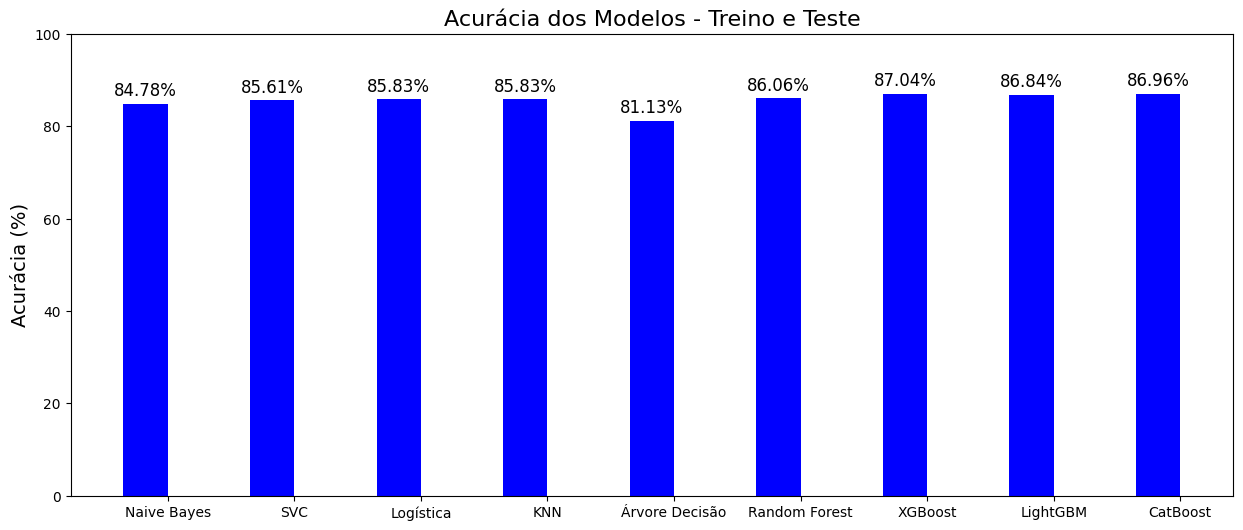

In [221]:
# Gráfico Acurácia Treino e Teste
modelos = ['Naive Bayes', 'SVC', 'Logística', 'KNN', 'Árvore Decisão', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']
acuracias_treino_teste = [acuracia_naive*100, acuracia_svc*100, acuracia_logistica*100, acuracia_knn*100, acuracia_tree*100, acuracia_random*100, acuracia_xgb*100, acuraria_lgbm*100, acuracia_cat*100]
x = np.arange(len(modelos))
largura = 0.35
fig, ax = plt.subplots(figsize=(15,6))
barras1 = ax.bar(x - largura/2, acuracias_treino_teste, largura, label='Acurácia (Treino e Teste)', color='b')
ax.set_ylabel('Acurácia (%)', fontsize=14)
ax.set_title('Acurácia dos Modelos - Treino e Teste', fontsize=16)
ax.set_xticks(x)  
ax.set_xticklabels(modelos)
ax.set_ylim(0, 100)
for barra in barras1:
   altura = barra.get_height()
   ax.annotate(f'{altura:.2f}%',
               xy=(barra.get_x() + barra.get_width() / 2, altura),
               xytext=(0, 3),  
               textcoords="offset points",
               ha='center', va='bottom', fontsize=12)
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_15204\4077795769.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




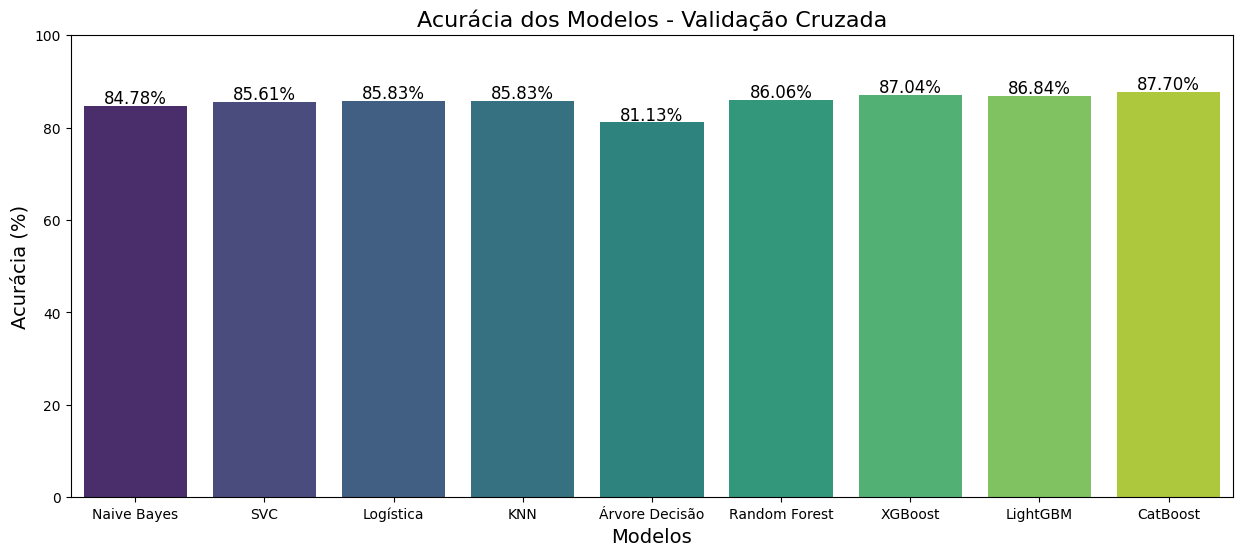

In [222]:
# GRAFICO ACURÁCIAS DOS MODELOS VALIDAÇÃO CRUZADA
modelos = ['Naive Bayes', 'SVC', 'Logística', 'KNN', 'Árvore Decisão', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']
acuracias = [acuracia_naive*100, acuracia_svc*100, acuracia_logistica*100, acuracia_knn*100, acuracia_tree*100, acuracia_random*100, acuracia_xgb*100, acuraria_lgbm*100, acuracia_media_cat*100]
plt.figure(figsize=(15,6))
sns.barplot(x=modelos, y=acuracias, palette='viridis')
plt.ylim(0, 100)
plt.title('Acurácia dos Modelos - Validação Cruzada', fontsize=16)
plt.ylabel('Acurácia (%)', fontsize=14)
plt.xlabel('Modelos', fontsize=14)
for i in range(len(modelos)):
   plt.text(i, acuracias[i] + 0.5, f'{acuracias[i]:.2f}%', ha='center', fontsize=12)
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_15204\2984588613.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




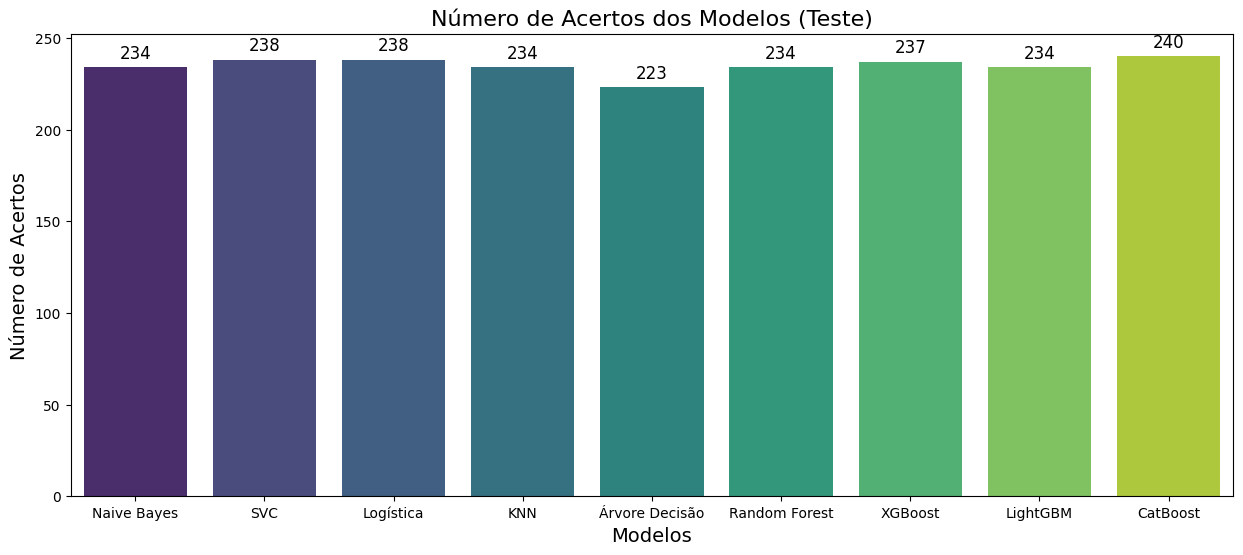

In [223]:
# GRAFICO ACERTOS DOS MODDELOS, OU SEJA, SOMA DOS VERDADEIROS POSITIVOS E VERDADEIROS NEGATIVOS
modelos = ['Naive Bayes', 'SVC', 'Logística', 'KNN', 'Árvore Decisão', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']
acertos = [
   matriz_confusao_teste[0,0] + matriz_confusao_teste[1,1],
   confusion_mtx_svc_teste[0,0] + confusion_mtx_svc_teste[1,1],
   confusion_mtx_logica_teste[0,0] + confusion_mtx_logica_teste[1,1],
   confusion_matrix_knn_teste[0,0] + confusion_matrix_knn_teste[1,1],
   confusion_mtx_tree_teste[0,0] + confusion_mtx_tree_teste[1,1],
   confusion_matrix_randon_teste[0,0] + confusion_matrix_randon_teste[1,1],
   confusion_mtx_xgb_teste[0,0] + confusion_mtx_xgb_teste[1,1],
   matriz_confusao_lgbm_teste[0,0] + matriz_confusao_lgbm_teste[1,1],
   matriz_confusao_cat_teste[0,0] + matriz_confusao_cat_teste[1,1]
]
plt.figure(figsize=(15,6))
sns.barplot(x=modelos, y=acertos, palette='viridis')
plt.title('Número de Acertos dos Modelos (Teste)', fontsize=16)
plt.ylabel('Número de Acertos', fontsize=14)
plt.xlabel('Modelos', fontsize=14)
for i in range(len(modelos)):
   plt.text(i, acertos[i] + 5, f'{acertos[i]}', ha='center', fontsize=12)
plt.show()

## **Relatório do Algoritmo Escolhido**

* **Nome**
  * **CatBoost**
* **Acurácia**
  * Treino/ Teste - previsores_catboost
    * 86,96%
  * Validação cruzada - previsores
    * 87,70%
* **Acertos**
  * 240